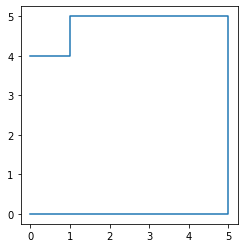

62.0
4.0
952408144115.0
49061.0
92556825427032.0


In [100]:
from pprint import pprint
import re
from functools import reduce
import itertools
from collections import Counter
import numpy as np
from dataclasses import dataclass

sample1 = """R 6 (#70c710)
D 5 (#0dc571)
L 2 (#5713f0)
D 2 (#d2c081)
R 2 (#59c680)
D 2 (#411b91)
L 5 (#8ceee2)
U 2 (#caa173)
L 1 (#1b58a2)
U 2 (#caa171)
R 2 (#7807d2)
U 3 (#a77fa3)
L 2 (#015232)
U 2 (#7a21e3)"""

def decode_hex(hex):
    h = hex.strip()[2:-1]
    direction = {
        '0': directions.right,
        '1': directions.down,
        '2': directions.left,
        '3': directions.up
    }[h[-1]]

    length = int(h[:-1],16)
    return direction, length


class directions:
    up = (0,1)
    down = (0,-1)
    left = (-1,0)
    right = (1,0)

    def get(string):
        if string == 'U':
            return directions.up
        elif string == 'D':
            return directions.down
        elif string == 'L':
            return directions.left
        elif string == 'R':
            return directions.right
        else:
            raise ValueError('Not a direction')

@dataclass
class puzzle_line:
    dx: int
    dy: int
    length: int
    color: str

    def dig_from(self,x,y):
        return x+(self.length)*self.dx, y+(self.length)*self.dy

    def dig_from2(self,x,y):
        direction, length = decode_hex(self.color)
        dx,dy = direction
        return x+length*dx, y+length*dy

def parse_line(line):
    orient, length, color = line.strip().split()
    return puzzle_line(*directions.get(orient), int(length), color)


def get_input(n):
    with open('input_'+n+'.txt', 'r') as infile:
        return infile.read().strip().strip('\n')
puzzle = get_input('18')

def parse_input(puzzle):
    return list(map(parse_line,puzzle.split('\n')))


def visualize(seen):
    #get xmax and ymax
    xmax = max([x for x,y in seen])
    ymax = max([y for x,y in seen])
    #get min x and y
    xmin = min([x for x,y in seen])
    ymin = min([y for x,y in seen])

    #create empty array
    line = ['.']*(xmax-xmin+1)
    layout = [line]*(ymax-ymin+1)

    # replay seen
    for x,y in seen:
        layout[y-ymin][x-xmin] = '#'
    return layout


def plot(seen):
    import matplotlib.pyplot as plt
    plt.plot(*zip(*seen))
    plt.gca().set_aspect('equal')
    plt.show()


def shoelace(x_y):
    x_y = np.array(x_y)
    x_y = x_y.reshape(-1,2)

    x = x_y[:,0]
    y = x_y[:,1]

    S1 = np.sum(x*np.roll(y,-1))
    S2 = np.sum(y*np.roll(x,-1))

    area = .5*np.absolute(S1 - S2)

    return area

assert shoelace([(0,0),(0,2),(2,2),(2,0)]) == 4
assert shoelace([(3,3),(-3,3),(-3,-3),(3,-3)]) == 36
assert shoelace([(0,0),(5,0),(5,5),(1,5),(1,4),(0,4),(0,0)]) == 24

plot([(0,0),(5,0),(5,5),(1,5),(1,4),(0,4)])

def solve1(puzzle):
    pl = parse_input(puzzle)
    seen = [(0,0)]

    lengths = []
    for l in pl:
        seen.append(l.dig_from(*seen[-1]))
        #print(seen[-1])
        lengths.append(l.length)
    circum = sum(lengths)
    area = shoelace(seen[:-1])
    internal_vertices = area - circum/2+1
    return internal_vertices+circum

def solve2(puzzle):
    pl = parse_input(puzzle)
    seen = [(0,0)]

    lengths = []
    for l in pl:
        seen.append(l.dig_from2(*seen[-1]))
        #print(seen[-1])
        lengths.append(decode_hex(l.color)[1])
    circum = sum(lengths)
    area = shoelace(seen[:-1])
    internal_vertices = area - circum/2+1
    return internal_vertices+circum

print(solve1(sample1))

sample2 = """R 1 (#70c710)
D 1 (#70c710)
L 1 (#70c710)
U 1 (#70c710)"""

print(solve1(sample2))
print(solve2(sample1))
print(solve1(puzzle))
print(solve2(puzzle))

(-7, 0)
(-7, 6)
(-10, 6)
(-10, 9)
(-19, 9)
(-19, 17)
(-29, 17)
(-29, 14)
(-22, 14)
(-22, 6)
(-29, 6)
(-29, 0)
(-34, 0)
(-34, 6)
(-36, 6)
(-36, 12)
(-38, 12)
(-38, 14)
(-41, 14)
(-41, 3)
(-45, 3)
(-45, 0)
(-50, 0)
(-50, 9)
(-52, 9)
(-52, 14)
(-56, 14)
(-56, 19)
(-63, 19)
(-63, 30)
(-67, 30)
(-67, 33)
(-57, 33)
(-57, 35)
(-53, 35)
(-53, 38)
(-61, 38)
(-61, 42)
(-67, 42)
(-67, 49)
(-70, 49)
(-70, 51)
(-74, 51)
(-74, 42)
(-79, 42)
(-79, 51)
(-85, 51)
(-85, 54)
(-89, 54)
(-89, 62)
(-99, 62)
(-99, 57)
(-106, 57)
(-106, 62)
(-115, 62)
(-115, 68)
(-119, 68)
(-119, 70)
(-125, 70)
(-125, 78)
(-118, 78)
(-118, 88)
(-110, 88)
(-110, 92)
(-103, 92)
(-103, 94)
(-96, 94)
(-96, 98)
(-88, 98)
(-88, 102)
(-85, 102)
(-85, 105)
(-82, 105)
(-82, 117)
(-79, 117)
(-79, 122)
(-77, 122)
(-77, 125)
(-66, 125)
(-66, 128)
(-63, 128)
(-63, 134)
(-57, 134)
(-57, 137)
(-53, 137)
(-53, 139)
(-49, 139)
(-49, 142)
(-39, 142)
(-39, 145)
(-32, 145)
(-32, 152)
(-30, 152)
(-30, 156)
(-21, 156)
(-21, 151)
(-11, 151)
(-11, 1

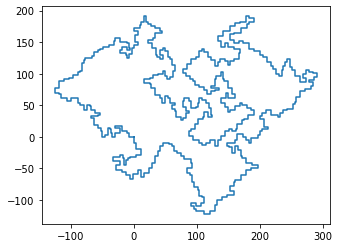

50668.0


In [76]:
print(solve1(puzzle))